In [ ]:
#Th is code provides a image classifier functionality using CNN with tensorflow
#we are going to identify a image whether cat or dog. (cat og classifier)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time


c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
#deciding on the batch size and the image size(pixels) we are going to feed into our model
BATCH_SIZE=32
IMAGE_SIZE=(128,128) 

In [13]:
#provide the train data location and test data location
train_data_dir="cats_dogs/train"
test_data_dir="cats_dogs/test"

In [14]:
#we divide the training data set for training and validation
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,subset='training',validation_split=0.1,seed=42)
validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,subset='validation',validation_split=0.1,seed=42)
test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [15]:
#Check on the classes avaiable in the dataset
class_names=train_data.class_names
class_names

['cats', 'dogs']

In [16]:
#check on the image batch shape    32 images in a 1 batch, each image is in 128*128*2 shape where 3 denotes RGB 
for image_batch, label_batch in train_data.take(1):#here 1 means the first batch from the data set in train_data
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


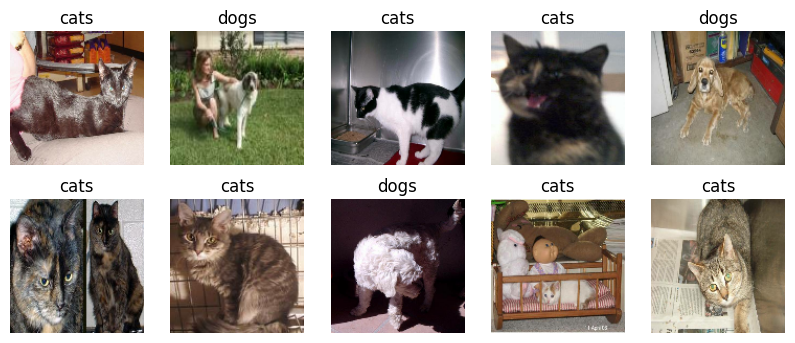

In [17]:
#plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax=plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')


In [18]:
# Here we check the first image (take is 1 for batch 1. range is taken as 1 for first image) value, values are between 0 and 255. 
for image,label in train_data.take(1):
    for i in range(1):
        print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [19]:
#normalize this data value to 0-1 range
train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [20]:
#check back the values again for the first image, now the values are between 0 and 1
for image,label in train_data.take(1):
    for i in range(1):
        print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [21]:
#Data augmentation
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal',input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    ])

c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model=tf.keras.Sequential()
model.add(data_augmentation)# data augmentation is added as the first layer in the model, so that it can be applied to the training data during training. It will help to increase the diversity of the training data and reduce overfitting.

#now we add the convolutional layers and max pooling layers to the model. The convolutional layers will help to extract features from the images, while the max pooling layers will help to reduce the spatial dimensions of the feature maps and retain the most important information.
model.add(tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))# dropout layer is added to prevent overfitting by randomly setting a fraction of the input units to 0 during training.
model.add(tf.keras.layers.BatchNormalization())# batch normalization layer is added to normalize the activations of the previous layer, which can help to improve the training speed and stability of the model.

model.add(tf.keras.layers.Flatten())# flatten layer is added to convert the 2D feature maps into a 1D vector, which can be fed into the fully connected layers.

model.add(tf.keras.layers.Dense(128, activation='relu'))# fully connected layer with 128 units and ReLU activation function is added to learn complex patterns in the data.
model.add(tf.keras.layers.Dense(128, activation='relu'))# fully connected layer with 64 units and ReLU activation function
model.add(tf.keras.layers.Dense(32, activation='relu'))# fully connected layer with 32 units and ReLU activation function
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))# output layer with 1 unit and sigmoid activation function is added to produce a binary classification output (0 or 1) for cat or dog.

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])# compile the model with Adam optimizer, binary cross-entropy loss function, and accuracy metric.

In [54]:
start_time=time.time()
history=model.fit(train_data, epochs=20, validation_data=validation_data)# fit the model on the training data for 10 epochs and validate on the validation data.
end_time=time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.7960 - loss: 0.4375 - val_accuracy: 0.5663 - val_loss: 0.5609
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.8078 - loss: 0.4198 - val_accuracy: 0.8263 - val_loss: 0.3917
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.8024 - loss: 0.4258 - val_accuracy: 0.8200 - val_loss: 0.3907
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.8119 - loss: 0.4061 - val_accuracy: 0.8163 - val_loss: 0.3948
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.8132 - loss: 0.4046 - val_accuracy: 0.8037 - val_loss: 0.4088
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.8146 - loss: 0.3991 - val_accuracy: 0.7475 - val_loss: 0.6382
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.8222 - loss: 0.3929 - val_accuracy: 0.8388 - val_loss: 0.3755
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.8260 - loss: 0.3837 - 

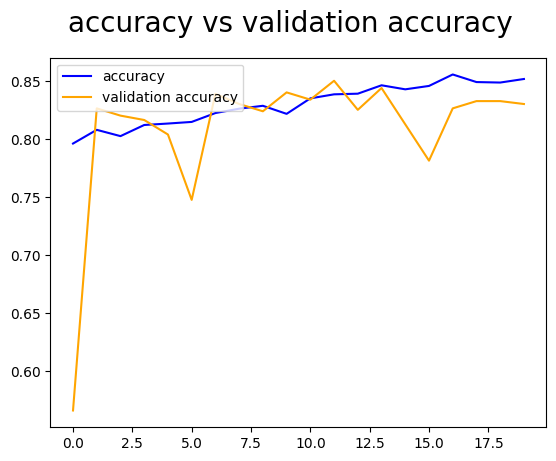

In [55]:
fig=plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='validation accuracy')
fig.suptitle('accuracy vs validation accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

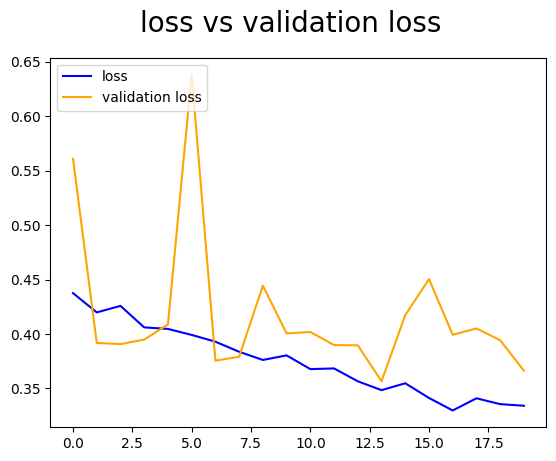

In [56]:
fig2=plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='validation loss')
fig2.suptitle('loss vs validation loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [57]:
#Evalaute the model on the test data
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.BinaryAccuracy()

In [58]:
for batch in test_data.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    yhat=tf.round(yhat)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [59]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8408377170562744>

In [60]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8029999732971191>

In [61]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8255000114440918>

In [62]:
#use the creaed model to predict on a new image
!pip install opencv-python
import cv2


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


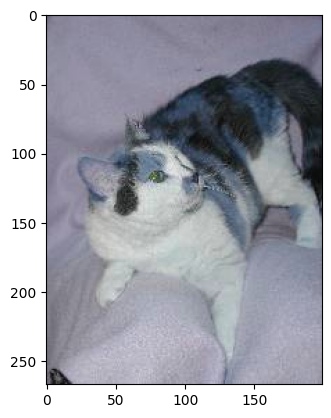

In [70]:
image=cv2.imread('cats_dogs/test/cats/cat.4012.jpg')# read the image using OpenCV
plt.imshow(image)
plt.show()

In [71]:
resized_image=tf.image.resize(image, IMAGE_SIZE)# resize the image to the same size as the input of the model
scaled_image=resized_image/255# scale the image to the same range as the input of the model
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.42165366, 0.40596738, 0.48047718],
        [0.43624386, 0.4205576 , 0.4950674 ],
        [0.48390013, 0.46821386, 0.54272366],
        ...,
        [0.43604073, 0.4007466 , 0.50662893],
        [0.40291652, 0.3676224 , 0.47350475],
        [0.3564851 , 0.32119098, 0.42707333]],

       [[0.42841074, 0.41272447, 0.48723426],
        [0.45217526, 0.43648896, 0.5109988 ],
        [0.49555358, 0.4798673 , 0.55437714],
        ...,
        [0.4455463 , 0.4230279 , 0.5289103 ],
        [0.43622854, 0.41371018, 0.5195925 ],
        [0.41688645, 0.39436808, 0.5002504 ]],

       [[0.44795507, 0.4322688 , 0.5067786 ],
        [0.47775334, 0.46206707, 0.53657687],
        [0.5058588 , 0.4901725 , 0.5646823 ],
        ...,
        [0.46646398, 0.46374434, 0.5657051 ],
        [0.46637562, 0.46115926, 0.56312007],
        [0.4561885 , 0.45158535, 0.55354613]],

       ...,

       [[0.3909361 , 0.37836328, 0.41527364],
        [0.40

In [72]:
#make the shape into (1,128,128,3) for the model to predict
scaled_image=tf.expand_dims(scaled_image, axis=0)
scaled_image.shape

TensorShape([1, 128, 128, 3])

In [73]:
y_hat=model.predict(scaled_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [74]:
y_hat

array([[0.31447974]], dtype=float32)

In [75]:
#since class contains cats and dogs, cat<0.5, dog>0.5
if y_hat>=0.5:
    print("The image is a dog")
else:
    print("The image is a cat")

The image is a cat
